### 파이토치 기본

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# 폰트 관련 용도
import matplotlib.font_manager as fm

In [2]:
# 나눔 고딕 폰트의 경로 명시
path = 'C:/Windows/Fonts/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()

font_name

'NanumGothic'

In [3]:
# warning 표시 끄기
import warnings
warnings.simplefilter('ignore')

# 기본 폰트 설정
plt.rcParams['font.family'] = font_name

# 기본 폰트 사이즈 변경
plt.rcParams['font.size'] = 14

# 기본 그래프 사이즈 변경
plt.rcParams['figure.figsize'] = (6,6)

# 기본 그리드 표시
# 필요에 따라 설정할 때는, plt.grid()
plt.rcParams['axes.grid'] = True

# 마이너스 기호 정상 출력
plt.rcParams['axes.unicode_minus'] = False

# 넘파이 부동소수점 자릿수 표시
np.set_printoptions(suppress=True, precision=4)

#### 텐서 라이브러리 등록

In [4]:
## 파이토치 라이브러리
import torch

#### 다양한 텐서 만들기

In [10]:
## 0차원 텐서(스칼라, Scalar)
r0 = torch.tensor(1.0).float()

# type, dtype 확인
type(r0), r0.dtype

(torch.Tensor, torch.float32)

In [6]:
## shape확인, 데이터확인
r0.shape, r0.data

(torch.Size([]), tensor(1.))

In [13]:
## 1차원 텐서(벡터, Vector)

# 1계 넘파이 변수 작성
r1_np = np.array([1, 2, 3, 4, 5])
print(r1_np.shape)

# 넘파이에서 텐서로 변환
r1 = torch.tensor(r1_np).float()

# dtype, shape, 데이터 확인
(r1.dtype, r1.shape, r1.data)

(5,)


(torch.float32, torch.Size([5]), tensor([1., 2., 3., 4., 5.]))

In [12]:
## 2차원 텐서(행렬, Matrix)

# 2계 넘파이 변수 작성
r2_np = np.array([[1, 5, 6], [4, 3, 2]])
print(r2_np.shape)

# 넘파이에서 텐서로 변환
r2 = torch.tensor(r2_np).float()

# shape 및 데이터 확인
(r2.shape, r2.data)

(2, 3)


(torch.Size([2, 3]),
 tensor([[1., 5., 6.],
         [4., 3., 2.]]))

In [14]:
## 3차원 텐서(배열, Array)

# 난수 seed 초기화
torch.manual_seed(123)

# shape=[3,2,2]의 정규분포 텐서 작성
r3 = torch.randn((3, 2, 2))

# shape 확인, 데이터 확인
(r3.shape, r3.data)

(torch.Size([3, 2, 2]),
 tensor([[[-0.1115,  0.1204],
          [-0.3696, -0.2404]],
 
         [[-1.1969,  0.2093],
          [-0.9724, -0.7550]],
 
         [[ 0.3239, -0.1085],
          [ 0.2103, -0.3908]]]))

In [15]:
## 4차원 텐서(배열, Array)

# 요소가 모두 1인 shape=[2,3,2,2] 텐서 작성
r4 = torch.ones((2, 3, 2, 2))

# shape, 데이터
(r4.shape, r4.data)

(torch.Size([2, 3, 2, 2]),
 tensor([[[[1., 1.],
           [1., 1.]],
 
          [[1., 1.],
           [1., 1.]],
 
          [[1., 1.],
           [1., 1.]]],
 
 
         [[[1., 1.],
           [1., 1.]],
 
          [[1., 1.],
           [1., 1.]],
 
          [[1., 1.],
           [1., 1.]]]]))

#### 정수값을 갖는 텐서 생성

In [20]:
r5 = r1.long()

# dtype 확인
(r5.dtype, r5)

(torch.int64, tensor([1, 2, 3, 4, 5]))

#### 뷰함수

In [21]:
## 2차원 화
# 남은 자리에 -1을 지정하면 이 수를 자동으로 조정함
r6 = r3.view(3, -1)

# shape 및 데이터 확인
(r6.shape, r6.data)

(torch.Size([3, 4]),
 tensor([[-0.1115,  0.1204, -0.3696, -0.2404],
         [-1.1969,  0.2093, -0.9724, -0.7550],
         [ 0.3239, -0.1085,  0.2103, -0.3908]]))

In [22]:
## 1차원화
# 남은 자리에 -1을 지정하면 이 수를 자동으로 조정함
r7 = r3.view(-1)

# shape 및 데이터 확인
(r7.shape, r7.data)

(torch.Size([12]),
 tensor([-0.1115,  0.1204, -0.3696, -0.2404, -1.1969,  0.2093, -0.9724, -0.7550,
          0.3239, -0.1085,  0.2103, -0.3908]))

#### 그 밖 속성

In [23]:
# requires_grad 속성
print('requires_grad: ', r1.requires_grad)

# device 속성
print('device: ', r1.device)

requires_grad:  False
device:  cpu


#### item 함수

In [27]:
# 스칼라 텐서(0차원)는 item 함수로 값을 꺼낼 수 있음
item = r0.item()

(type(item), item)

(float, 1.0)

In [28]:
# 스칼라 이외의 텐서에 item 함수는 무효
r1.item()

RuntimeError: a Tensor with 5 elements cannot be converted to Scalar

In [29]:
# 요소 수가 하나뿐인 1차원 텐서는 OK. 2차원 이상에서도 동일
t1 = torch.ones(1)

# shape 및 item함수 확인
(t1.shape, t1.item())

(torch.Size([1]), 1.0)

#### max 함수

In [31]:
## 탠서 확인
(r2.data, r2.max())

(tensor([[1., 5., 6.],
         [4., 3., 2.]]),
 tensor(6.))

In [32]:
# torch max 함수
# 두번째 인수는 기준이 되는 축을 의미
torch.max(r2.data, 1)

torch.return_types.max(
values=tensor([6., 4.]),
indices=tensor([2, 0]))

In [33]:
# 몇 번째 요소가 최대값인지 indices 확인으로 통해 확인 가능
torch.max(r2.data, 1)[1]

tensor([2, 0])

#### 넘파이 변수로 변환

In [36]:
## 넘파이로 변환
r2_np = r2.data.numpy()

# 타입 및 데이터 확인
(type(r2_np), r2_np)

(numpy.ndarray,
 array([[1., 5., 6.],
        [4., 3., 2.]], dtype=float32))

#### 2차 함수 경사계산

##### 데이터준비

In [37]:
## x를 넘파이 배열로 정의
x_np = np.arange(-2, 2.1, 0.25)

x_np

array([-2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,
        0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ])

In [38]:
## 경사 계산용 변수 정의
x = torch.tensor(x_np, requires_grad=True, dtype=torch.float32)

x

tensor([-2.0000, -1.7500, -1.5000, -1.2500, -1.0000, -0.7500, -0.5000, -0.2500,
         0.0000,  0.2500,  0.5000,  0.7500,  1.0000,  1.2500,  1.5000,  1.7500,
         2.0000], requires_grad=True)

##### 2차 함수 계산

- $ y = 2x^2 + 2 $

In [39]:
y = 2 * x**2 + 2

In [40]:
y

tensor([10.0000,  8.1250,  6.5000,  5.1250,  4.0000,  3.1250,  2.5000,  2.1250,
         2.0000,  2.1250,  2.5000,  3.1250,  4.0000,  5.1250,  6.5000,  8.1250,
        10.0000], grad_fn=<AddBackward0>)

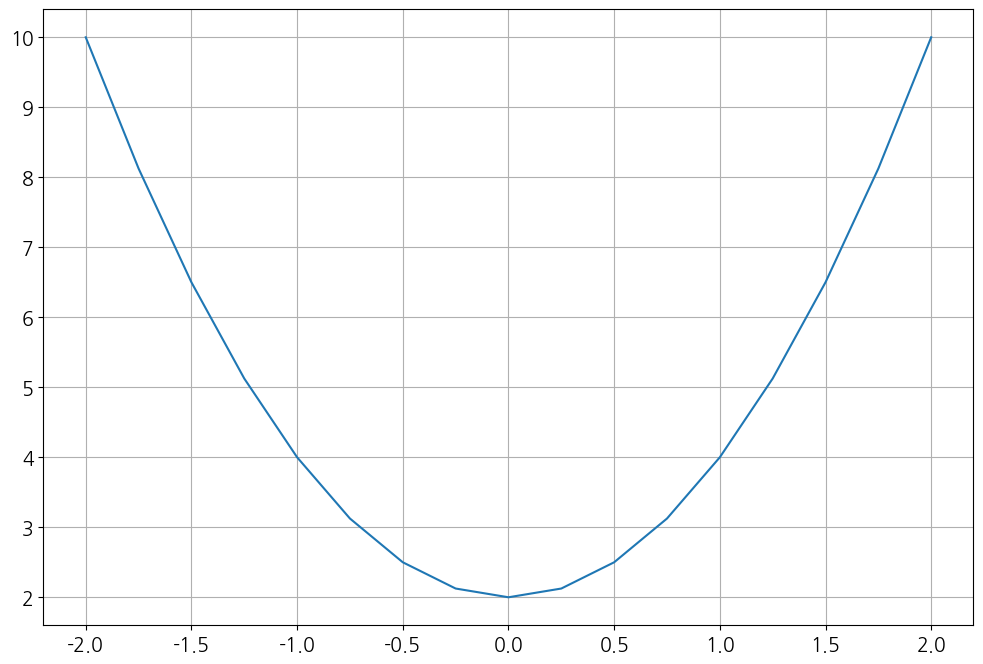

In [43]:
## 그래프 출력
plt.figure(figsize=(12,8))
plt.plot(x.data, y.data)
plt.grid(True)
plt.show()

In [44]:
# 경사 계산을 위해 최종 값은 스칼라일 필요가 있으므로, 더미로 sum 함수를 붙임
z = y.sum()

##### 계산 그래프 시각화

In [45]:
from torchviz import make_dot

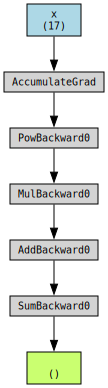

In [46]:
# 시각화 함수 호출
g= make_dot(z, params={'x': x})
display(g)

- AccumulateGrad : 해당 텐서의 grad에 gradient 저장
- PowBackward0 : Pow 연산을 수행
- MulBackward0 : 곱셉 연산
- ...

In [47]:
## 경사 계산
z.backward()

In [48]:
## 경사값 가져오기
x.grad

tensor([-8., -7., -6., -5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,
         6.,  7.,  8.])

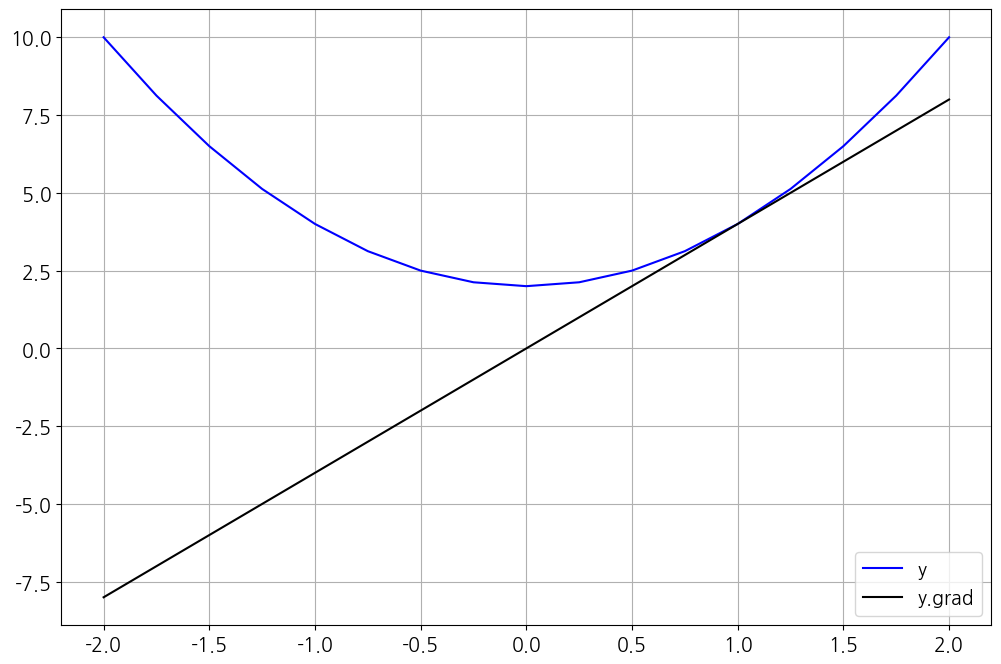

In [50]:
# 원래 함수와 경사 그래프
plt.figure(figsize=(12,8))
plt.plot(x.data, y.data, c='b', label='y')
plt.plot(x.data, x.grad.data, c='k', label='y.grad')
plt.legend()
plt.show()

- 원래 함수가 2차 함수이기 때문에 경사 계산의 결과가 직선인 것은 타당한 결과

In [51]:
# 경사를 초기화하지 않고 두번째 경사를 계산

y = 2 * x**2 + 2
z = y.sum()
z.backward()

# x의 경사 확인
x.grad

tensor([-16., -14., -12., -10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,   6.,
          8.,  10.,  12.,  14.,  16.])

- 경삿값은 경사 계산의 값이 점차 합해진 결과. 새로운 값을 계산하기 위해서 경삿값을 조기화 해야 함

In [52]:
# 경사값 초기화는 zero_() 함수 사용
x.grad.zero_()
x.grad

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

##### 시그모이드 함수 경사 계산
- 시그모이드 함수는 수식으로 나타내면 다음과 같지만, 여기서는 파이토치에서 제공하는 함수를 사용

$$ y = \frac {1} {1 + exp(-x)}

In [63]:
# 시그모이드 함수의 정의
sigmoid = torch.nn.Sigmoid()

In [64]:
## y값의 계산
y = sigmoid(x)

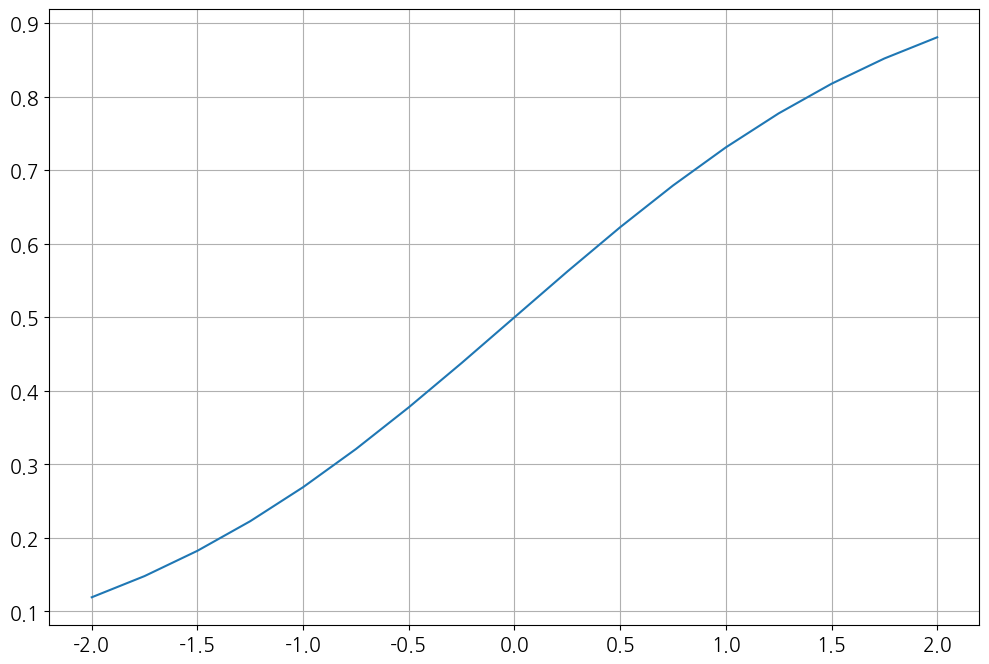

In [65]:
## 그래프 출력
plt.figure(figsize=(12,8))
plt.plot(x.data, y.data)
plt.show()

In [66]:
# 경사 계산을 위해 최종 값은 스칼라일 필요가 있으므로, 더미로 sum 함수를 붙임
z = y.sum()

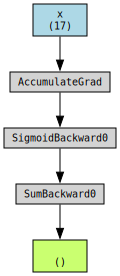

In [67]:
# 계산 그래프 시각화
g = make_dot(z, params={'x': x})
display(g)

In [68]:
# (4) 경사 계산
z.backward()

# (5) 경삿값 확인
print(x.grad)

tensor([0.2100, 0.2523, 0.2983, 0.3462, 0.3932, 0.4358, 0.4700, 0.4923, 0.5000,
        0.4923, 0.4700, 0.4358, 0.3932, 0.3462, 0.2983, 0.2523, 0.2100])


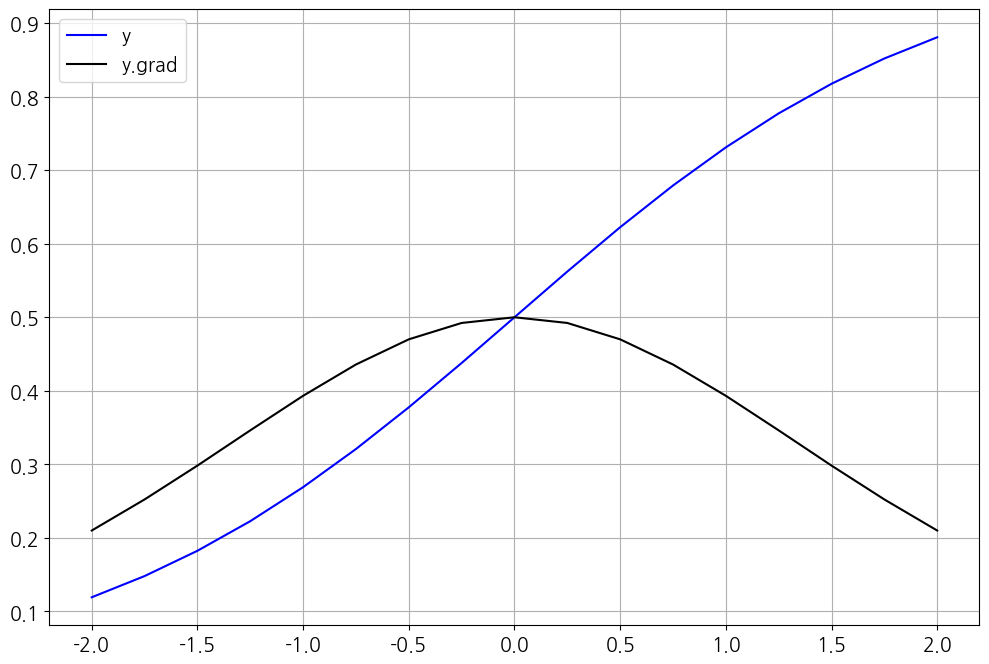

In [70]:
# 원래 함수와 경사 그래프
plt.figure(figsize=(12,8))
plt.plot(x.data, y.data, c='b', label='y')
plt.plot(x.data, x.grad.data, c='k', label='y.grad')
plt.legend()
plt.show()

- 시그모이드 함수의 경사는 $ y(1 - y) $
- 2차 함수, $ y = \frac {1} {2} (x = 0 일때) $ , 최대값 $ \frac {1} {4} $ 를 얻음.

In [71]:
# (6) 경사 초기화는 zero_() 함수를 사용

x.grad.zero_()
print(x.grad)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


##### 시그모이드 함수를 직접 구현

In [72]:
# 시그모이드 함수의 정의

def sigmoid(x):
    return(1/(1 + torch.exp(-x)))

In [73]:
# (2) y값의 계산

y = sigmoid(x)

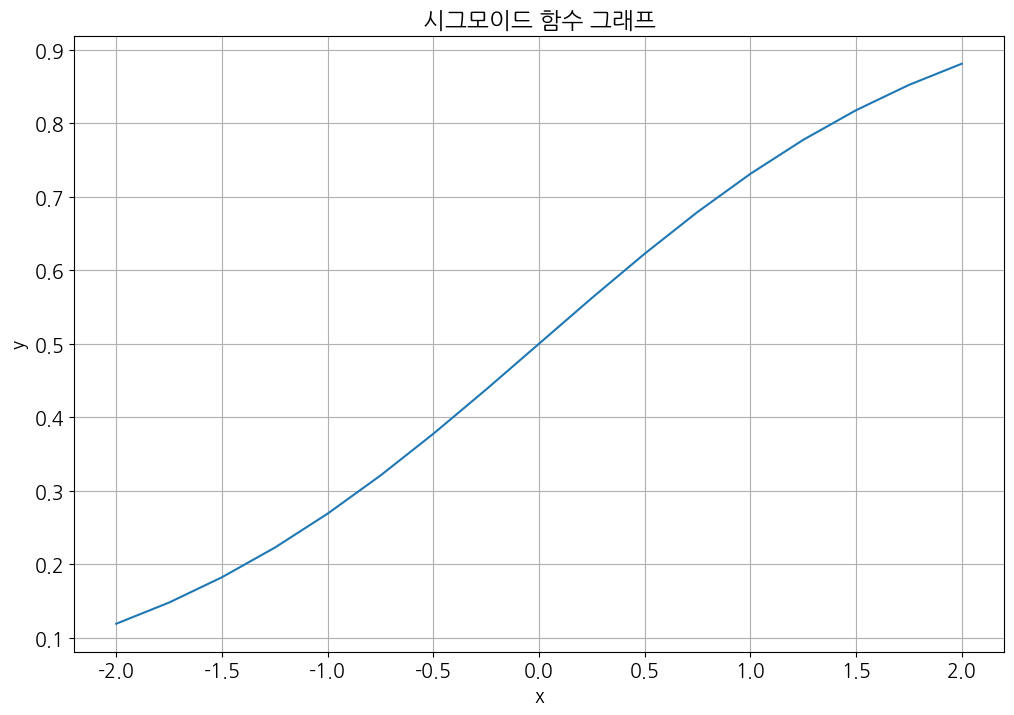

In [75]:
# 그래프(산포도) 출력
plt.figure(figsize=(12,8))
plt.plot(x.data, y.data)
plt.xlabel('x')
plt.ylabel('y')
plt.title('시그모이드 함수 그래프')
plt.show()

In [76]:
# 경사 계산을 위해 최종 값은 스칼라일 필요가 있으므로, 더미로 sum 함수를 붙임
z = y.sum()

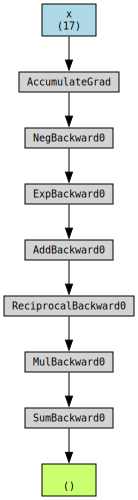

In [77]:
# (3) 계산 그래프 시각화

params = {'x': x}
g = make_dot(z, params=params)
display(g)

- ReciprocalBackward0 : 역수 계산

In [78]:
# (4) 경사 계산
z.backward()

# (5) 경삿값 확인
print(x.grad)

tensor([0.1050, 0.1261, 0.1491, 0.1731, 0.1966, 0.2179, 0.2350, 0.2461, 0.2500,
        0.2461, 0.2350, 0.2179, 0.1966, 0.1731, 0.1491, 0.1261, 0.1050])


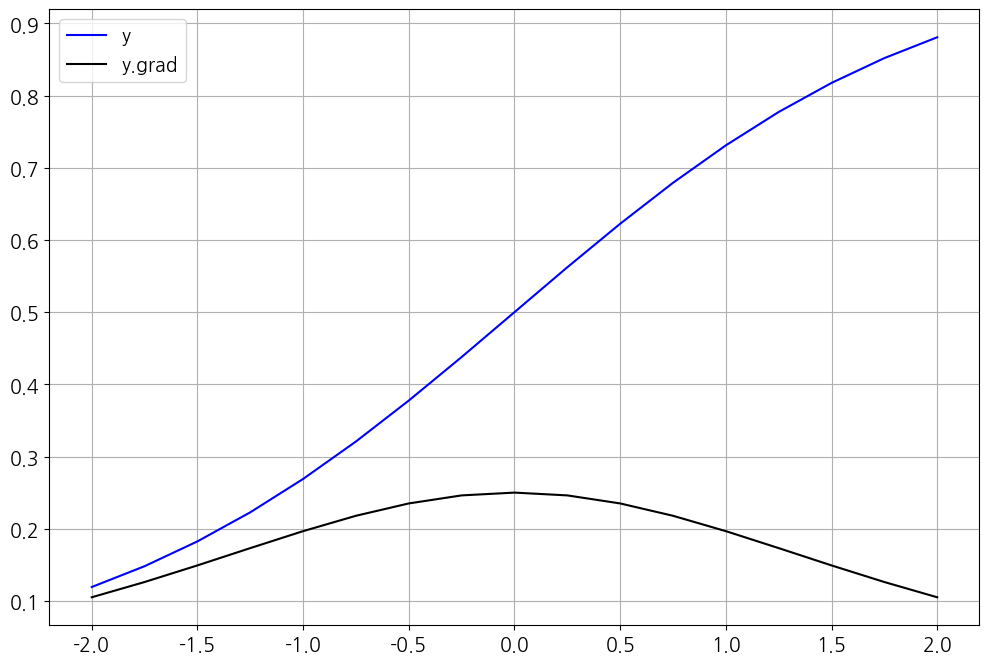

: 

In [80]:
# 원래 함수와 경사 그래프
plt.figure(figsize=(12,8))

plt.plot(x.data, y.data, c='b', label='y')
plt.plot(x.data, x.grad.data, c='k', label='y.grad')
plt.legend()
plt.show()